In [153]:
import networkx as nx
import numpy as np

[[0.         0.         0.25       0.         0.         0.25
  0.25       0.         0.         0.25      ]
 [0.         0.         0.         0.33333333 0.33333333 0.
  0.         0.         0.33333333 0.        ]
 [0.2        0.         0.         0.2        0.         0.2
  0.2        0.         0.         0.2       ]
 [0.         0.25       0.25       0.         0.         0.
  0.25       0.         0.         0.25      ]
 [0.         0.33333333 0.         0.         0.         0.
  0.         0.         0.33333333 0.33333333]
 [0.33333333 0.         0.33333333 0.         0.         0.
  0.         0.         0.33333333 0.        ]
 [0.2        0.         0.2        0.2        0.         0.
  0.         0.2        0.2        0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.        ]
 [0.         0.25       0.         0.         0.25       0.25
  0.25       0.         0.         0.        ]
 [0.25       0.         0.25    

C:\Users\Filip Kalkan\AppData\Local\Temp\ipykernel_6436\3304856537.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_mat = nx.adjacency_matrix(G).todense()


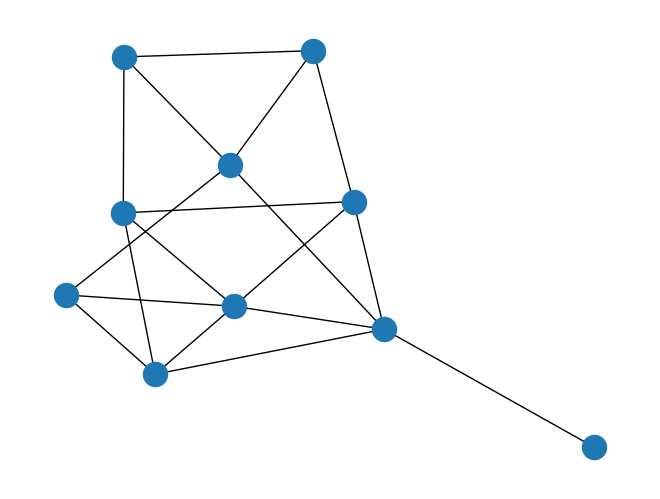

In [154]:
G = nx.gnp_random_graph(10, p=0.4)
# G.add_edges_from([
#     (0, 2),
#     (2, 3),
#     (1, 2)
# ])
nx.draw(G)
adj_mat = nx.adjacency_matrix(G).todense()
P = adj_mat / adj_mat.sum(axis=1)
# P = np.array([
#     [0, 0, 1/3, 0],
#     [0, 0, 1/3, 0],
#     [1, 1, 0, 1],
#     [0, 0, 1/3, 0],
# ])
print(P)

In [155]:
alpha = 0.8
q = 0
t = 5
I = np.eye(*P.shape)

def e_q(q):
    e_q = np.zeros((P.shape[0], 1))
    e_q[q][0] = 1.0
    return e_q

In [156]:
nx.pagerank_scipy(G, alpha=alpha, personalization={q: 1})

C:\Users\Filip Kalkan\AppData\Local\Temp\ipykernel_6436\2999556209.py:1: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  nx.pagerank_scipy(G, alpha=alpha, personalization={q: 1})


{0: 0.2883608256620635,
 1: 0.0406326960382504,
 2: 0.13869797995179592,
 3: 0.07428165781852296,
 4: 0.045787168845519144,
 5: 0.09342988190971648,
 6: 0.12418162374180593,
 7: 0.019868785148382587,
 8: 0.0678287145215739,
 9: 0.10693066636236917}

In [165]:
def ppr_by_def(q, P, alpha):
    return (1 - alpha) * np.linalg.inv(I - (alpha * np.transpose(P))) @ e_q(q)

def ppr_by_def_iter(q, P, alpha, t):
    if t == 0:
        return e_q(q)
    else:
        prev = ppr_by_def_iter(q, P, alpha, t-1)
        return (alpha * np.transpose(P)) @ prev + (1 - alpha) * e_q(q)

actual_pprs = { v: ppr_by_def(v, P, alpha) for v in G.nodes() }
actual_pprs_iter = { v: ppr_by_def_iter(v, P, alpha, t) for v in G.nodes() }

print(ppr_by_def(q, P, alpha))
print(' ')
print(ppr_by_def_iter(q, P, alpha, t))

[[0.28836142]
 [0.04063201]
 [0.13869837]
 [0.07428202]
 [0.045787  ]
 [0.09342976]
 [0.12418139]
 [0.01986902]
 [0.0678287 ]
 [0.1069303 ]]
 
[[0.28181208]
 [0.04544749]
 [0.13646131]
 [0.06649721]
 [0.04183429]
 [0.09997676]
 [0.13795891]
 [0.01668233]
 [0.05903269]
 [0.11429693]]


In [176]:
def ppr_experimental_whole(P, alpha, t):
    if t == 0:
        return I
    else: 
        return (1 - alpha) * I + alpha * P @ ppr_experimental_whole(P, alpha, t-1)

print(ppr_experimental_whole(P, alpha, t))

[[0.28181208 0.04544749 0.13646131 0.06649721 0.04183429 0.09997676
  0.13795891 0.01668233 0.05903269 0.11429693]
 [0.06059665 0.27470965 0.07638104 0.12639582 0.12476639 0.0435286
  0.06870762 0.01594103 0.14133699 0.06763621]
 [0.10916905 0.04582863 0.30313023 0.09902766 0.04509112 0.08753421
  0.12547909 0.0178886  0.06143059 0.10542083]
 [0.06649721 0.09479686 0.12378457 0.27486709 0.05427589 0.0539234
  0.13388718 0.01631824 0.06525507 0.11639448]
 [0.05577905 0.12476639 0.07515187 0.07236785 0.27675196 0.05064729
  0.07771187 0.01086047 0.13388227 0.12208099]
 [0.13330235 0.0435286  0.14589034 0.07189787 0.05064729 0.26276248
  0.08102798 0.01919841 0.12361088 0.0681338 ]
 [0.11036713 0.04122457 0.12547909 0.10710975 0.04662712 0.04861679
  0.29954623 0.0566399  0.1026398  0.06174963]
 [0.0667293  0.04782308 0.08944299 0.06527295 0.0325814  0.05759522
  0.28319949 0.2346112  0.05618347 0.06656091]
 [0.05903269 0.10600274 0.07678824 0.06525507 0.1004117  0.09270816
  0.12829975 0

In [168]:
def ppr_experimental(q, P, alpha, t):
    if t == 0:
        return e_q(q)
    else:
        return (1 - alpha) * e_q(q) + alpha * np.transpose(P) @ ppr_experimental(q, P, alpha, t - 1)

print(ppr_experimental(q, P, alpha, t))

[[0.28181208]
 [0.04544749]
 [0.13646131]
 [0.06649721]
 [0.04183429]
 [0.09997676]
 [0.13795891]
 [0.01668233]
 [0.05903269]
 [0.11429693]]


In [169]:
def ppr(q, G, alpha, t):
    if t == 0:
        return e_q(q)
    else:
        neighs = list(G.neighbors(q))
        pi_neighs = [ ppr(v, G, alpha, t-1) for v in neighs ]
        return (1 - alpha) * e_q(q) + alpha * (1 / len(neighs)) * np.sum(pi_neighs, axis=0)

print(ppr(q, G, alpha, t))

[[0.28181208]
 [0.04544749]
 [0.13646131]
 [0.06649721]
 [0.04183429]
 [0.09997676]
 [0.13795891]
 [0.01668233]
 [0.05903269]
 [0.11429693]]


In [170]:
def ppr_old(q, G, alpha, t):
    if t == 0:
        return e_q(q)
    else:
        neighs = list(G.neighbors(q))
        pi_neighs = [ ppr_old(v, G, alpha, t-1) for v in neighs ]
        return (1 - alpha) * ppr_old(q, G, alpha, t-1) + alpha * (1 / len(neighs)) * np.sum(pi_neighs, axis=0)

print(ppr(q, G, alpha, t))

[[0.28181208]
 [0.04544749]
 [0.13646131]
 [0.06649721]
 [0.04183429]
 [0.09997676]
 [0.13795891]
 [0.01668233]
 [0.05903269]
 [0.11429693]]


All nodes

In [177]:
pprs = ppr_experimental_whole(P, alpha, t)
pprs = { v: pprs[v][:] for v in G.nodes() }
diffs = { v: np.sum(pprs[v] - actual_pprs_iter[v]) for v in G.nodes() }
print(diffs)

{0: -5.273559366969494e-16, 1: -2.220446049250313e-16, 2: 4.163336342344337e-17, 3: 7.216449660063518e-16, 4: -4.3021142204224816e-16, 5: -2.0816681711721685e-16, 6: 7.91033905045424e-16, 7: 7.632783294297951e-16, 8: -6.522560269672795e-16, 9: -8.604228440844963e-16}
